# Visualization with Seaborn

Seaborn is a package that provides an API on top of Matplotlib that offers sane choices for plot style and color defaults and defines simple high-level functions for common statistical plot types, making it an extremely useful tool.

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its default plot scheme. As usual, we must start with the default boilerplate imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now we create some random walk data:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And here we have a simple plot with Matplotlib defaults:

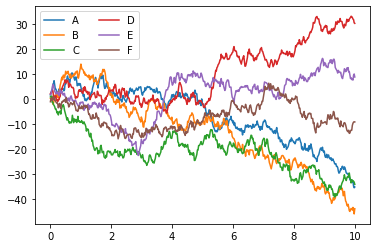

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

One might argue that, despite the fact that the resulting plot conveys all the information we'd like it to, it does so in a way that is not all that aesthetically pleasing, but simplistic and old-fashioned.

Now let's take a look at how it works with Seaborn. The package has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters. By convention, Seaborn is imported as `sns`:

In [4]:
import seaborn as sns
sns.set() # Overwrite Matplotlib's defaults

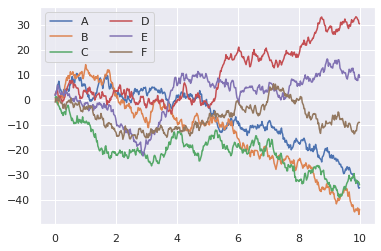

In [5]:
# Plot the same data with Seaborn defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

Seaborn provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn.

### Histograms, KDE, and densities

Often in statistical data visualization, we want to plot histograms and joint distributions of variable. We've seen that this is straightforward in Matplotlib:

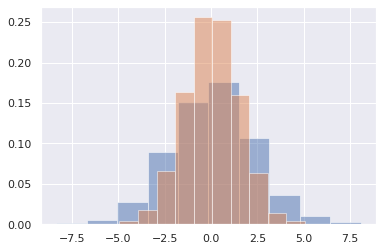

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot`:

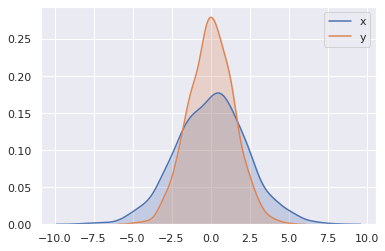

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Seaborn allows us to combine both histograms and KDE using `distplot`:

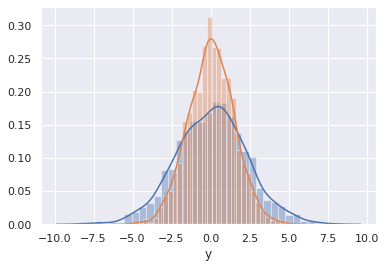

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass both dimensions of the dataset to `kdeplot`, we get a two-dimensional visualization of the data:

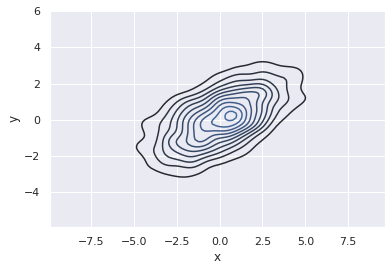

In [9]:
sns.kdeplot(data['x'], data['y']);

We can see the joint distribution and the marginal distributions together using `sns.jointplot`:

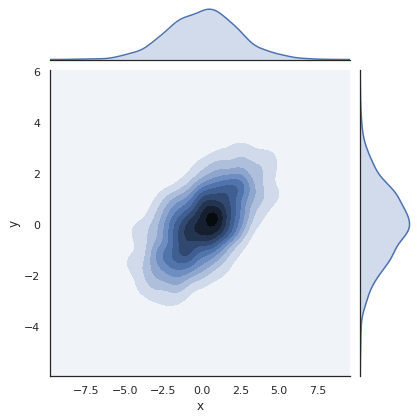

In [10]:
# Temporarily set the style to a white background
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde')

We can mess around with other parameters of `jointplot` to produce, for example, a hexagonally based histogram instead:

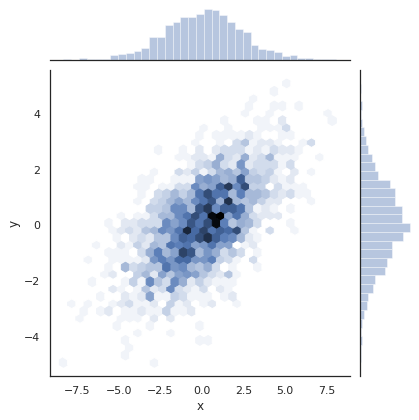

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

We can generalize joint plots to datasets of larger dimensions to produce _pair plots_. This is very useful for exploring correlations between multidimensional data, since it plots all pairs of values against each other.

We'll use the well-known Iris datasets to show this:

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


To visualize the multidimensional relationships among the samples we just need to call `sns.pairplot`:

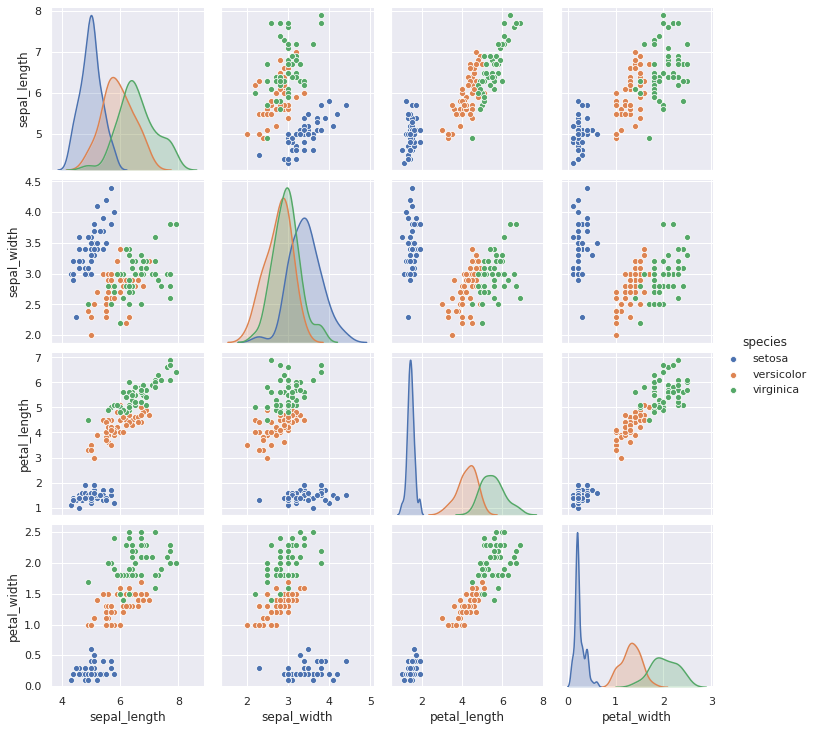

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

Histograms of subsets can be a very good way to view data. Seaborn's `FacetGrid` makes this extremely simple. To show this, we'll use some data that shows the amount that restaurant staff receive in tips based on various indicators:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


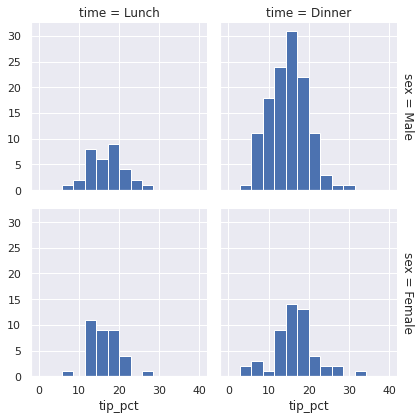

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows us to view the distribution of a parameter within bins defined by any other parameter:

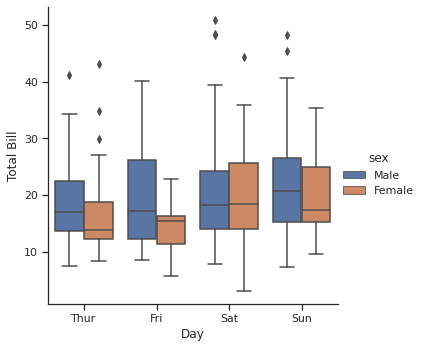

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

We can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions:

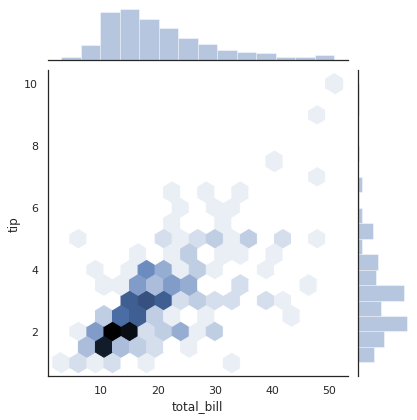

In [17]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

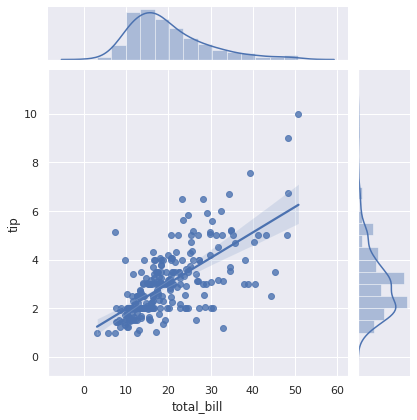

In [18]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using `sns.catplot`. In the following example, we'll use the same Planets data we've seen before.

In [19]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


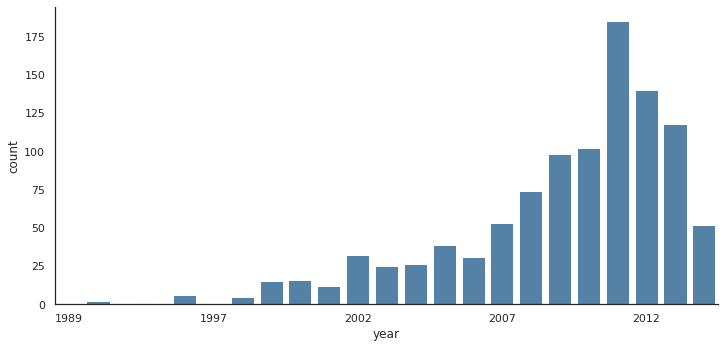

In [20]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the _method_ of discovery of each of these planets:

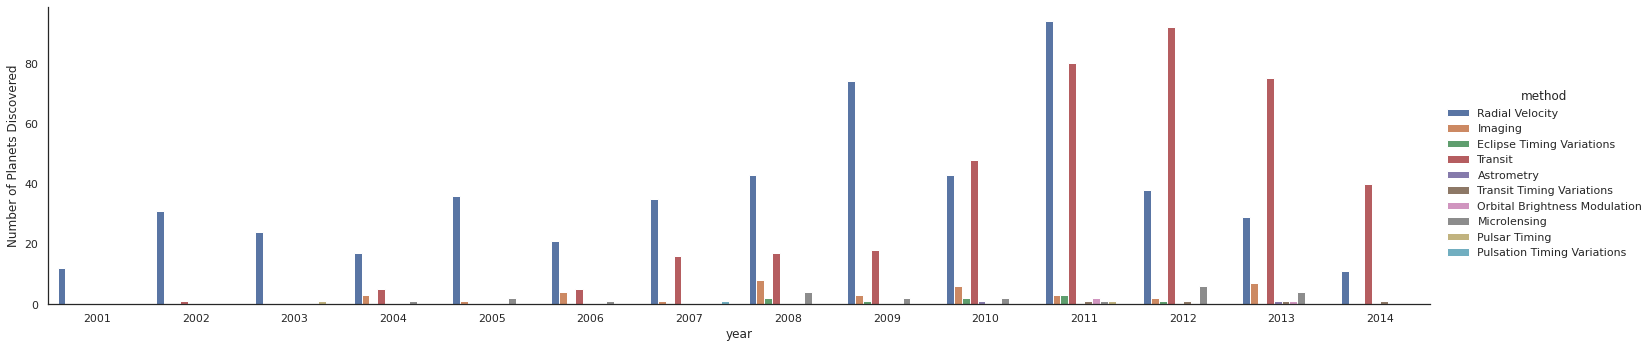

In [21]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

We'll look at using Seaborn to help visualize and understand finishing results from a marathon. We will start by loading the data into Pandas:

In [22]:
data = pd.read_csv('../data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type `object`). We can see this by looking at the `dtypes` attribute of the `DataFrame`:

In [23]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

We can fix this by providing a converter for the times:

In [24]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('../data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


We can now verify that the time columns are now of type `timedelta64[ns]`:

In [25]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

For the purpose of our Seaborn plotting utilities, let's add columns that give the times in seconds:

In [26]:
data['split_sec'] = data['split'].astype(int) / 1e9
data['final_sec'] = data['final'].astype(int) / 1e9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


We can plot a `catplot` over the data to get an idea of what it looks like:

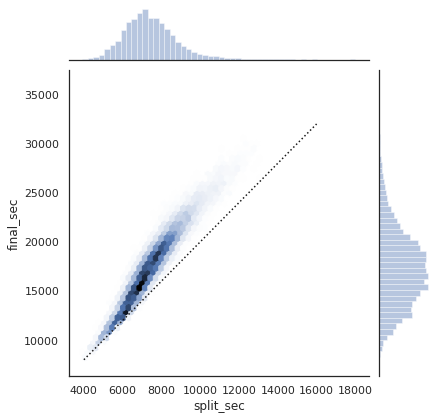

In [27]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone-'s time would lie if they ran the marathon at a perfectly steady pace. As one might expect, we can see that people slow down over the course of the marathon.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits (run faster during the second half of the race) or positive-splits the race:

In [28]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction. We can visualize this by constructing a distribution plot of this split fraction:

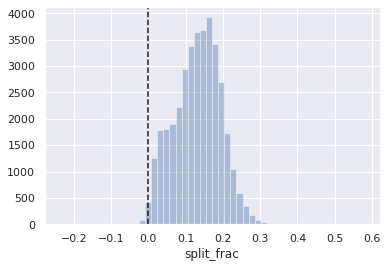

In [29]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [30]:
# Equivalent to calling python's sum() or the sum() method, but I find it more clear
np.count_nonzero(data.split_frac < 0)

251

Out of nearly 40 thousand participants, there were only 250 people who negative-split their marathon.

We can investigate if there is any correlation between this split fraction and other variables. To visualize this, the `pairgrid` plot is a great tool:

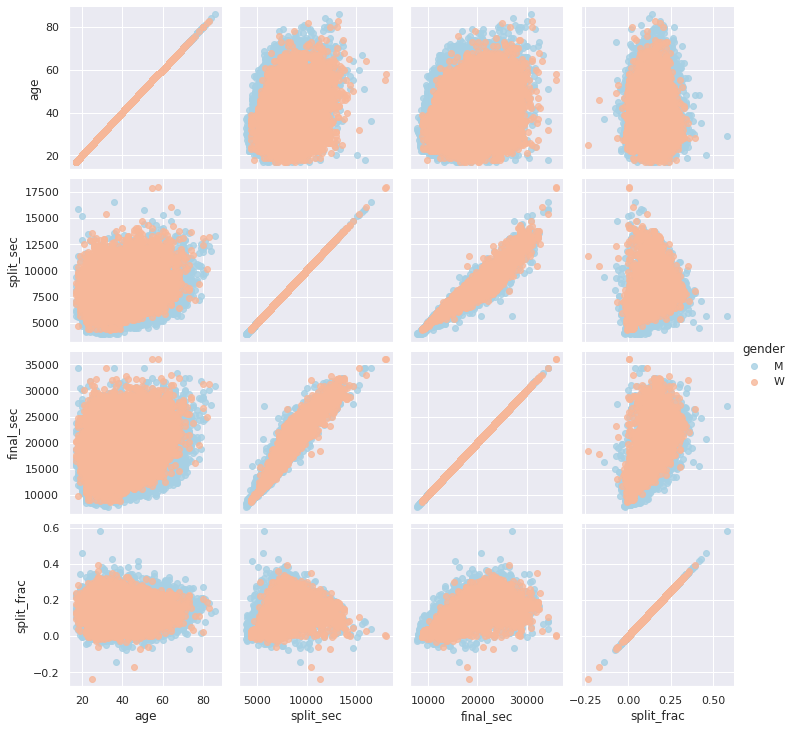

In [31]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Look like the split fraction does not correlate with age, but it does with the final time: faster runners tend to have closer to even splits on their marathon time.

We'll now take a look at the differences between men and women. For that, we will plot the histogram of split fractions for these two groups:

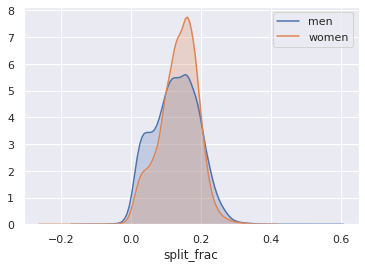

In [32]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

We can see that there are many more men than women who are running close to an even split. We can go a bit further by looking at the distributions as a function of age.

A nice way to compare distributions is to use a _violin plot_:

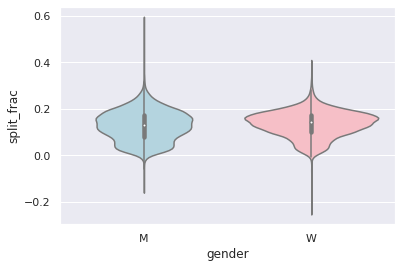

In [33]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

Let's dive even deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [34]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


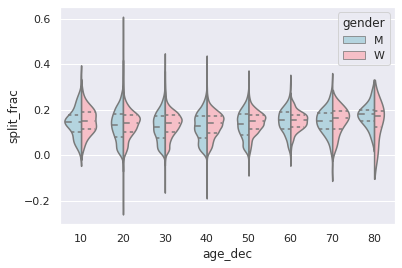

In [35]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distribution of men and women differ: the split distributions of men in theirs 20s to 50s show a pronounced over-density toward lower splits when compared to women of any age.

Also, we can see that the 80-year-old women seem to outperform _everyone_ in terms of their split time. This is likely due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [36]:
(data.age > 80).sum()

7

Back to the men with negative splits, we can visualize some interesting information about them very easily using `regplot`, which will automatically fit a linear regression to the data:

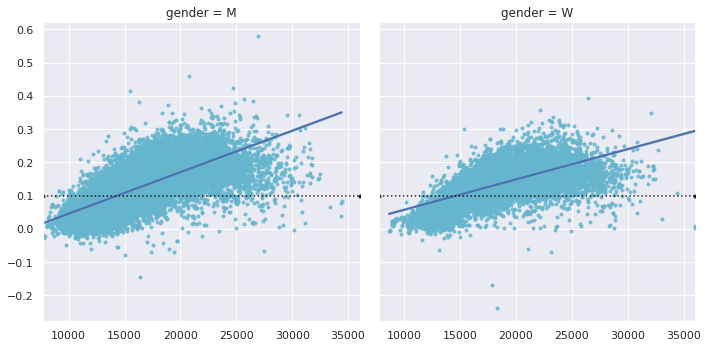

In [37]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the runners who are finishing within about 4 hours. People slower than that are much less likely to have a fast second split.